In [54]:
%display latex

Pablo DI MUZIO, L2 Mathématiques

# TP N°1 De Math303
## Exercice 1: Graphe d'une fonction
Dans ce premier exercice le but est de plotter une fonction de deux variables 
en jouant sur les paramètres de plot et les fonctions pour varier résultats différents.


### Question 1:
Plotter deux fonctions dans [-1,1] x [-1,1]

In [55]:
f(x,y) = 3/4 + (x**2 + 4*x*y + y**2)/2 + (x**2)*(y**2)
g(x,y) = (x**2) * ((1+y**2) + y**2)

In [56]:
show(plot3d(f, (x, -1, 1), (y, -1, 1)))
show(plot3d(g, (x, -1, 1), (y, -1, 1)))

Graphics3d Object

Graphics3d Object

### Question 2:

In [57]:
show(plot3d(f, (x, -1/2, 1/2), (y, -1/2, 1/2)))
show(plot3d(g, (x, -1/2, 1/2), (y, -1/2, 1/2)))

Graphics3d Object

Graphics3d Object

## Exercice 2:
### Question 1:
Plotter la fonction
$$f:[-2,2] \times [-2,2] \rightarrow \mathbb R$$
$$f:(x,y) \rightarrow x^3-4xy^2$$

In [58]:
f(x,y) = x**3 - 4*x*y**2

In [59]:
show(plot3d(f, (x, -2, 2), (y, -2, 2)))

Graphics3d Object

### Question 2:
On souhaite obtenir plutôt les lignes de niveau de la fonction plus qu'un graphe continu.
On utilise la fonction `contour_plot()`

In [60]:
c = contour_plot(f, (-2,2), (-2,2),contours=20, plot_points=150, fill=false, cmap="tab20", labels=true, label_fontsize=7, label_inline=true, label_colors="Black")

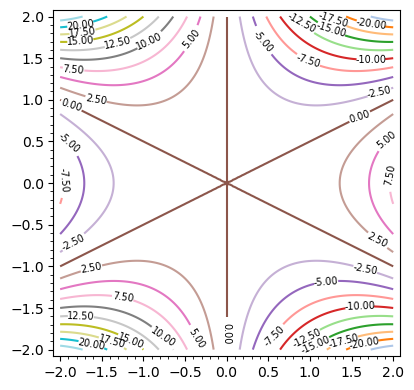

In [61]:
show(c)

### Question 3:
On veut maintenant juste les lignes dont le niveau égale les entiers $[\![-3, 3 ]\!]$

In [64]:
c = contour_plot(f, (-2,2), (-2,2),contours=(-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0), plot_points=150, fill=false, cmap="tab20", labels=true, label_fontsize=7, label_inline=true, label_colors="Black")

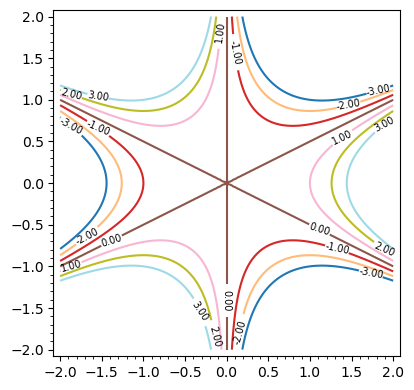

In [65]:
show(c)

## Exercice 3:
On réutilise la même fonction que pour l'Exercice 1.
### Question 1:
On cherche le vecteur d'origine $(1,1)$ et étant égal à $1/8$ du gradient de $f$ évalué au point $(1,1)$

In [66]:
V = VectorSpace(QQ, 2)
u1 = V((1,1))
df = f.gradient()
v = V(df(1,1)/8)
vecteur1 = u1+v
vecteur1

(7/8, 0)

(Ici il est inexacte d'utiliser l'espace vectoriel des Rationels sur une fonction des Réels, cependant le resultats est numériquement le même et permet un formatage d'écriture plaisant)

### Question 2:
Même question mais avec les points $(1,0)$ et $(-1,1)$ et des facteurs $1/3$ et $1/8$

In [67]:
u2 = V((1,0))
v = V(df(1,0)/3)
vecteur2 = u2+v
vecteur2

(2, 0)

In [68]:
u3 = V((-1,1))
v = V(df(-1,1)/8)
vecteur3 = u3+v
vecteur3

(-9/8, 2)

(l'astuce des rationnels fonctionne encore pour ces exemples)

### Question 3:
On trace les courbes de niveaux de $f$ et on cherche à voir où se situent les points cités précédemment

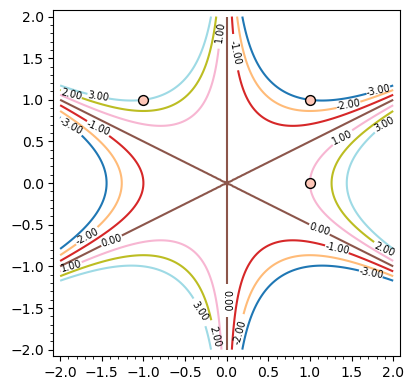

In [69]:
c = contour_plot(f, (-2,2), (-2,2),contours=(-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0), plot_points=150, fill=false, cmap="tab20", labels=true, label_fontsize=7, label_inline=true, label_colors="Black")

points = scatter_plot([(1,1), (1,0), (-1,1)]) 

show(c+points)

### Question 4:
On souhaite ajouter au graphe ci-dessus les vecteurs trouvés plus tôt.

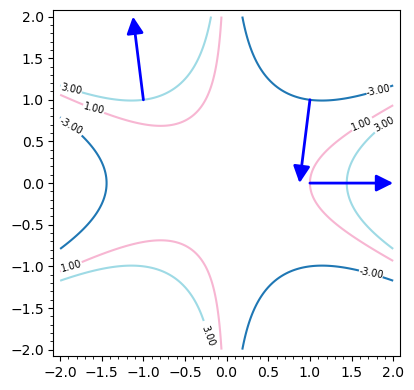

In [70]:
c = contour_plot(f, (-2,2), (-2,2),contours=(-3.0, 1.0, 3.0), plot_points=150, fill=false, cmap="tab20", labels=true, label_fontsize=7, label_inline=true, label_colors="Black")

vecteurs = arrow(u1,vecteur1) + arrow(u2,vecteur2) + arrow(u3,vecteur3)

show(c + vecteurs)

Il s'agit des vecteurs normaux à la courbe de niveau qui leur est associé.

## Exercice 4:
### Question 1:
Ploter la fonction
$$f:[-2,2] \times [-2,2] \rightarrow \mathbb R$$
$$f:(x,y) \rightarrow x^2-x^3+y^2$$

In [71]:
f(x,y) = x**2 - x**3 +y**2
show(plot3d(f, (x, -2, 2), (y, -2, 2)))

Graphics3d Object

### Question 2:

Visuellement, on conjecture que le point (0,0) est un point critique, minimum local.
et il existe un autre point, point-selle, dans la région $[0,1] \times \{0\}$

Pour répondre à la question, on calcul le Jacobien et on l'étudie, puis
on étudie la dérivée seconde de la fonction, c'est à  dire le Jacobien du Jacobien, donc le Héssien.

In [72]:
jacobian(f, (x,y))

[(x, y) |--> -3*x^2 + 2*x          (x, y) |--> 2*y]

On souhaite utiliser la fonction `solve` de sage pour trouver les points critiques 

In [73]:
solve((f.gradient()(x,y)[0]==0,f.gradient()(x,y)[1]==0),x,y)

[[x == 0, y == 0], [x == (2/3), y == 0]]

$(0,0)$ et $(\frac{2}{3}, 0)$ sont donc bien des points critiques. On veut vérifier si il s'agit de minimums/maximums locaux ou de points-selles.

In [74]:
g = f.hessian()
g

[(x, y) |--> -6*x + 2        (x, y) |--> 0]
[       (x, y) |--> 0        (x, y) |--> 2]

In [75]:
g(0,0)

[2 0]
[0 2]

In [76]:
g(2/3,0)

[-2  0]
[ 0  2]

Donc $(0,0)$ est un minimum local et $(\frac{2}{3}, 0)$ est un point-selle.

### Question 3:
On trace les lignes de niveau entre 0 et 2 avec un pas de 0,05.

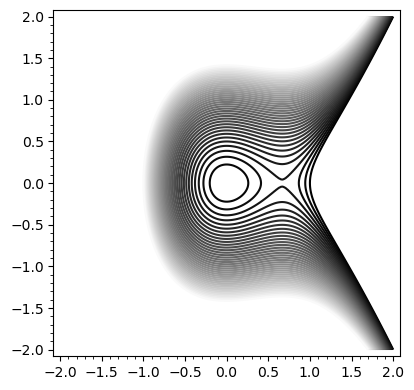

In [77]:
liste = []
for k in range(0,205,5):
    liste.append(k/100)

c = contour_plot(f, (x, -2, 2), (y, -2, 2), contours=liste, fill=false, plot_points=200)

show(c)

On a déjà calculer à l'aide de la Héssienne et de solve à la question 2, on sautera la question 4.

## Exercice 5:
### Question 1:
Calculer le gradient de la fonction suivante et trouver ses points critiques
$$f:\mathbb R^2 \rightarrow \mathbb R$$
$$f:(x,y) \rightarrow x^2+2y^2-2xy-x$$


In [78]:
f(x,y) = x**2 + 2*y**2 -2*x*y-x
f.gradient()

(x, y) |--> (2*x - 2*y - 1, -2*x + 4*y)

In [79]:
solve((f.gradient()(x,y)[0]==0,f.gradient()(x,y)[1]==0),x,y)

[[x == 1, y == (1/2)]]

### Question 2:
On trace le graphe sur l'intervalle $[-1,3]\times[-0.5,3.5]$

In [80]:
show(plot3d(f, (x, -1, 3), (y, -0.5, 3.5)))

Graphics3d Object

On voit clairement que la fonction semble avoir un minimum. 

### Question 3:
on trace les lignes de niveau pour trouver les valeurs approximatives du minimum.

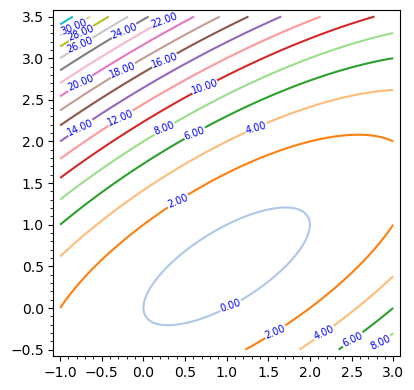

In [82]:
c = contour_plot(f, (-1, 3), (-0.5, 3.5),fill=false, labels=true, label_inline=true, contours=20, cmap="tab20", label_fontsize=7)
show(c)

On suppose que le ou les points de minimums seront dans les environs de 0.
### Question 4:
On utilise la méthode de du gradient à pas fixe pour trouver le minimum.

In [83]:
x = 1          #x0
y = 1          #y0

epsilon = 0.01 #seuil
rho = 0.01     #pas


nombre_iteration = 0

while f.gradient()(x, y).norm() > epsilon:
    nombre_iteration += 1
    (x,y) = (x - rho*f.gradient()(x, y)[0], y - rho*f.gradient()(x, y)[1])
print((x,y), nombre_iteration)


(1.01106490738956, 0.506838489198301) 392


Le gradient d'une fonction en un point A est le vecteur qui pointe vers la pente ascendante la plus forte de la fonction aux alentours de A.
On doit donc la multiplier par -1 pour faire pointer ce vecteur vers le point minimum avoisinant, c'est à dire le point le plus bas aux environs du point A.

En faisant varier les paramètres $(x_0, y_0), \varepsilon, \rho$ on voit clairement les variations dans le nombre d'itérations. On cherche à avoir le seuil le plus bas pour une meilleurs précision et le pas le plus haut pour minimiser les itérations.
Cependant on peut noter que fixer $\rho$ à une valeur très basse assure le fait de trouver un resultat et de ne pas tomber dans une boucle d'itérations infinies (ce qui est le cas si le pas est trop grand et "enjambe" la zone pour laquelle la condition sur $\varepsilon$ est remplie).

### Question 5:
On reprend les 4 questions précédentes avec la fonction
$$g:[-1,1] \times [-1,1] \rightarrow \mathbb R$$
$$g:(x,y) \rightarrow \frac{\sin(\pi(x^2+y^2)}{1+x^2}$$

In [84]:
g(x,y) = (sin(pi*(x**2+y**2)))/(1+x**2)
g.gradient()

(x, y) |--> (2*pi*x*cos(pi*x^2 + pi*y^2)/(x^2 + 1) - 2*x*sin(pi*x^2 + pi*y^2)/(x^2 + 1)^2, 2*pi*y*cos(pi*x^2 + pi*y^2)/(x^2 + 1))

In [85]:
solve((g.gradient()(x,y)[0]==0,g.gradient()(x,y)[1]==0),x,y)

[2*pi*y*cos(pi*x^2 + pi*y^2)/(x^2 + 1) == 0, 2*pi*x*cos(pi*x^2 + pi*y^2)/(x^2 + 1) - 2*x*sin(pi*x^2 + pi*y^2)/(x^2 + 1)^2 == 0]

On remarque que sage n'est pas capable de nous donner l'ensemble des points critiques cette fois-ci.
Nous traçons le graphe pour vérifier si des conjectures visuelles ne pourraient pas nous avancer. 

In [86]:
show(plot3d(g, (x, -1, 1), (y, -1, 1)))

Graphics3d Object

On voit clairement que la fonction admet un minimum local, sans doute en (0,0) mais aussi un maximum en deux points et deux autres point-selles.
Pour obtenir une zone dans laquelle on peut trouver ces points on utilise les courbes de niveaux.

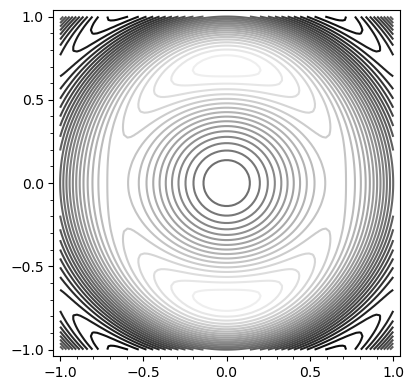

In [87]:
show(contour_plot(g, (x, -1, 1), (y, -1, 1), contours=30, fill=false))

On revoit notre minimum local au niveau du point (0,0) et nos maximums sur les points qui se situent dans les régions $\{0\} \times [-0.5,-0.75] \cup \{0\} \times [0.5,0.75]$

On commence par vérifier notre minimum local supposé.

In [88]:
g.gradient()(0,0)

(0, 0)

In [89]:
g.hessian()(0,0)

[2*pi    0]
[   0 2*pi]

La Héssienne a toutes ses composantes strictement positives en (0,0) et le gradient en (0,0) est égal à (0,0).  Donc (0,0) est un minimum local.

On veut donc maintenant trouver les points de maximum de notre fonction dans les régions définies plus haut en utilisant la méthode du gradient à pas fixe. On a juste à réutiliser le code plus haut et à changer le $-\rho$ en $+\rho$ dont la justification découle de notre conclusion à la Question 4.

Comme on approxime de toute façon ici les resultats, on pose pi=3.1415 pour faciliter les calculs à notre machine.

In [90]:
g(x,y) = (sin(3.1415*(x**2+y**2)))/(1+x**2)
h = g.gradient()

x = 0          #x0
y = 1          #y0

epsilon = 0.01 #seuil
rho = 0.001     #pas


nombre_iterations = 0

while N(g.gradient()(x, y)).norm() > epsilon:
    nombre_iterations += 1
    (x,y) = (x + rho*h(x, y)[0], y + rho*h(x, y)[1])
print((x,y), nombre_iterations)


(0, 0.707622303630185) 301


In [91]:
x = 0          #x0
y = -1          #y0


nombre_iterations = 0

while N(g.gradient()(x, y)).norm() > epsilon:
    nombre_iterations += 1
    (x,y) = (x + rho*h(x, y)[0], y + rho*h(x, y)[1])
print((x,y), nombre_iterations)

(0, -0.707622303630185) 301


On sait donc que la fonction admet un maximum aux alentours des points (0, -0.7076),(0,0.7076).

On remarque que cela semble très proche de $(0,\pm \frac {\sqrt 2}{ 2})$

On vérifie notre nouvelle hypothèse.

In [92]:
g(x,y) = (sin(pi*(x**2+y**2)))/(1+x**2)
print(g.gradient()(0,sqrt(2)/2),g.gradient()(0,-sqrt(2)/2))

(0, 0) (0, 0)


In [93]:
g.hessian()(0, sqrt(2)/2)

[     -2       0]
[      0 -2*pi^2]

In [94]:
g.hessian()(0, -sqrt(2)/2)

[     -2       0]
[      0 -2*pi^2]

On en conclut que le maximum de notre fonction est atteint en $(0,\pm \frac{\sqrt 2}{2})$

Il nous reste une dernière hypothèse à vérifier, celle des points-selles.
On modifie encore le code de notre algorithme du gradient à pas fixe.
D'après les courbes de niveaux, la fonction serait croissante sur l'axe x et décroissante sur l'axe y. On change donc les coéficients de $\rho$ en conséquences.

In [95]:
g(x,y) = (sin(3.1415*(x**2+y**2)))/(1+x**2)
h = g.gradient()

x1 = -1          #x0
y1 = 0          #y0

epsilon = 0.001 #seuil
rho = 0.0001     #pas


nombre_iterations = 0

while N(g.gradient()(x1, y1)).norm() > epsilon:
    nombre_iterations += 1
    (x1,y1) = (x1 + rho*h(x1, y1)[0], y1 - rho*h(x1, y1)[1])
print((x1,y1), nombre_iterations)

(-0.656064781321070, 0) 7016


In [96]:
x2 = 1          #x0
y2 = 0          #y0


nombre_iterations = 0

while N(g.gradient()(x2, y2)).norm() > epsilon:
    nombre_iterations += 1
    (x2,y2) = (x2 + rho*h(x2, y2)[0], y2 + rho*h(x2, y2)[1])
print((x2,y2), nombre_iterations)

(0.656064781321070, 0) 7016


Cette fois-ci la valeur que semble approché notre algorithme n'est pas distinctive et ne nous permet donc pas de trouver un point de valeur particulière.
On vérifie avec la valeur approchée si notre théorie est vraie avec la hésienne en $(x_1, y_1)$ et $(x_2, y_2)$ 

In [97]:
g.hessian()(x1,y1)

[-11.5954871098922                 0]
[                0 0.952675901674347]

In [98]:
g.hessian()(x2,y2)

[-11.5954871098922                 0]
[                0 0.952675901674347]

On a bel-et-bien des point-selles en coordonées $(x_1, y_1)$ et $(x_2, y_2)$.
On peut donc conclure notre étude de fonction.